# set up environments

In [1]:
# set up spark
import sys
sys.path += ['/opt/apache-spark/python/lib/py4j-0.10.1-src.zip','/opt/apache-spark/python/lib/pyspark.zip']
from pyspark import *
from pyspark.sql import *
spark = SparkSession.builder.getOrCreate()

# set up python
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# show table expir

In [2]:
expir = spark.read.parquet("outputs/tables/expir")
expir.show()
expir.groupBy('state').count().show()

+----------+-----+--------------------+--------+--------------------+
|       mid|index|                 vec|   state|          state_info|
+----------+-----+--------------------+--------+--------------------+
|   C135193|    0|[0.00361397414669...|     gas|                    |
| C13524044|    0|[0.03707088095581...|     gas|                    |
|C135306455|    0|[0.04274734070645...|     gas|                    |
| C13532188|    0|[0.08673884624658...|     gas|                    |
| C13532779|    0|[0.00413426645010...|     gas|                    |
| C13551730|    0|[0.00278372947403...|     gas|                    |
| C13552211|    0|[0.01343282537352...|     gas|                    |
| C13552211|    1|[0.4314, 0.436000...|  liquid|              (NEAT)|
| C13553190|    0|[0.4486, 0.4588, ...|   solid|(1 mg / 650 mg KB...|
| C13558708|    0|[0.02632057570003...|     gas|                    |
|   C135615|    0|[0.00917640734440...|     gas|                    |
|   C135626|    0|[0

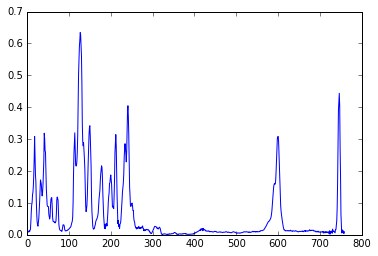

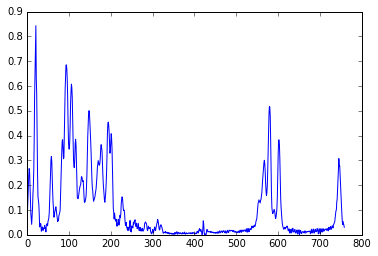

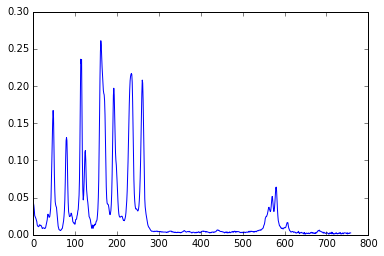

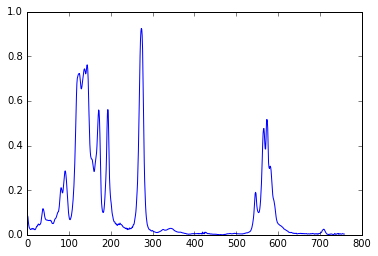

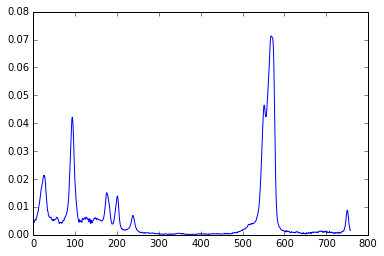

In [3]:
for i in expir.rdd.map(lambda x : x["vec"]).take(5):
    plt.plot(i)
    plt.show()

# show table mid_structure

In [4]:
midstruct = spark.read.parquet("outputs/tables/mid_structure")
midstruct.show()

+----------+--------------------+
|       mid|              smiles|
+----------+--------------------+
|  B6000033|CCOc1ccc(Cl)cc1N(...|
|  B6000784|CCC(CC)COC(=O)CC(...|
|  B6001298|OCC1OC(O)C(O)C(O)C1O|
|  B6002140|NC1=NC(=O)C2=NN=N...|
|  B6002856|O=C1C=CC2=C(c3ccc...|
|  B6004175|CCCCCC(C)(C)c1ccc...|
|  B6005264|COC(=O)C1(C)CCC2C...|
|  B6006708|COc1cc(C=C(C)[N+]...|
|  B6007558|COc1ccccc1C1CC(=O...|
|  B6008247|CCCC(C(=O)OC)P(=O...|
|  B6008475|CCC(C)(C)c1ccc(N)...|
|  B6008728|O=c1[nH]c(SCCO)nc...|
|  B6009280|CC(C)(C)c1ccccc1N...|
|  B6009589|CCCCCCCCCCOC(=O)c...|
|  B6010389|N#CCSc1nc(C(=O)N)...|
|C100123384|Cc1cc(Nc2ccc(Br)c...|
|  C1003174|         CC1(C)CCCO1|
|   C100505|        O=CC1CC=CCC1|
|   C100867|   CC(C)(O)Cc1ccccc1|
|   C101144|Nc1ccc(Cc2ccc(N)c...|
+----------+--------------------+
only showing top 20 rows



# show table thir

In [5]:
thir = spark.read.parquet("outputs/tables/thir")
thir.show()
thir.groupBy('method').count().show()

+--------------------+------------+--------------------+
|              smiles|      method|               freqs|
+--------------------+------------+--------------------+
|CCOc1ccc(Cl)cc1N(...|B3LYP/6-31G*|[[23.2942,0.7475]...|
|O=C1NC(c2ccccc2Cl...|B3LYP/6-31G*|[[18.7941,0.5832]...|
|O=C(COC(=O)c1cccc...|B3LYP/6-31G*|[[12.2118,0.7279]...|
|O=C(COC(=O)c1cccc...|B3LYP/6-31G*|[[10.5837,0.1164]...|
|O=C(COC(=O)c1cccc...|B3LYP/6-31G*|[[10.5759,0.1159]...|
|O=C(O)c1cccc(S(=O...|B3LYP/6-31G*|[[12.492,0.1121],...|
|CCOCCOC(=O)CCCCCC...|B3LYP/6-31G*|[[8.4892,0.0925],...|
|COC(=O)c1ccc([N+]...|B3LYP/6-31G*|[[43.3309,1.0047]...|
|  NC(CCC(=O)O)C(=O)O|B3LYP/6-31G*|[[20.262,6.8048],...|
|COc1cccc2c(Cl)c3c...|B3LYP/6-31G*|[[53.8339,0.0431]...|
|CCCCCCCCCCCCCCC=C...|B3LYP/6-31G*|[[3.9376,0.2833],...|
|CN1CCC(C#N)(C2=CC...|B3LYP/6-31G*|[[46.8755,0.5548]...|
|CC1CCC(=NNc2ccc([...|B3LYP/6-31G*|[[24.108,0.0491],...|
|CCN(c1ccc(N(CC)c2...|B3LYP/6-31G*|[[6.8872,0.1452],...|
|Cc1cc(O)c(CCCCC(C...|B3LYP/6-3

# table universe are on hipergator
too large to copy to my laptop...

# example on relational algebra

## example 1

get the (structure,spectrum) pair that satisfies:
* gas phase
* has theoretical spectrum

In [6]:
expir.filter(expir["state"]=="gas")                   \
     .join(midstruct,expir["mid"]==midstruct["mid"])  \
     .join(thir,midstruct["smiles"]==thir["smiles"])  \
     .select(midstruct["smiles"],"vec")               \
     .show()

+--------------------+--------------------+
|              smiles|                 vec|
+--------------------+--------------------+
|     Oc1ccc2ccccc2c1|[0.00361397414669...|
|     CC(O)c1ccccc1Cl|[0.03707088095581...|
|CCC(=O)c1cc(F)cc(...|[0.04274734070645...|
|       CC(C)(CO)CCCN|[0.00413426645010...|
|Cc1nn(C)c(Cl)c1[N...|[0.00278372947403...|
|            CCC(O)CN|[0.01343282537352...|
|    COC(=O)NC(=O)CCl|[0.02632057570003...|
|Cc1ccccc1NC(=O)c1...|[0.00917640734440...|
|c1ccc2c(c1)Nc1ccc...|[0.00126263065083...|
|  COc1ccc(OC)c(OC)c1|[0.03067097317510...|
| CC(C)c1ccc2ncccc2c1|[0.04785574572409...|
|Cc1cc([N+](=O)[O-...|[0.00571466182922...|
|CC(=O)c1ccc(Cl)c(...|[0.00987151250697...|
|NN=C1c2ccccc2c2cc...|[0.01512765047709...|
|   CCc1ccc(CC)c(C)c1|[2.07211187165268...|
|O=C(Oc1cccc(O)c1)...|[0.04498735862711...|
|  N#Cc1c(F)ccc(F)c1F|[0.00216919030407...|
|  CCCCOC(=O)c1ccccc1|[0.07298989554749...|
| CC(O)CSc1ccc(Cl)cc1|[0.00222657090750...|
|      CC(=O)c1sccc1C|[0.0035548